# Figure 2B

In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    
    # Experimental outgrowth data
    exp_time = [0, 2, 3, 4, 6, 8]
    exp_outgrowth = [0, 60, 160, 450, 1280, 2260]
    exp_outgrowth_err = [0, 10, 20, 40, 60, 70]
    
    # Experimental outgrowth plot
    ax.errorbar(exp_time , exp_outgrowth, yerr=exp_outgrowth_err, color='black',ecolor='black', fmt='o',markersize=11,elinewidth=3, label='Experimental outgrowth')

    ax.legend(loc='upper left', facecolor='white')
    plt.xlabel('Time (days)')
    plt.ylabel('Outgrowth' + ' (' + r'$\mu$'+'m)')
    plt.xlim(-0.2,8.2)
    plt.ylim(-50,2500)
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 24})
    filename = './' + 'Fig_2B.png'    
    fig.savefig(filename, dpi=300, bbox_inches='tight')

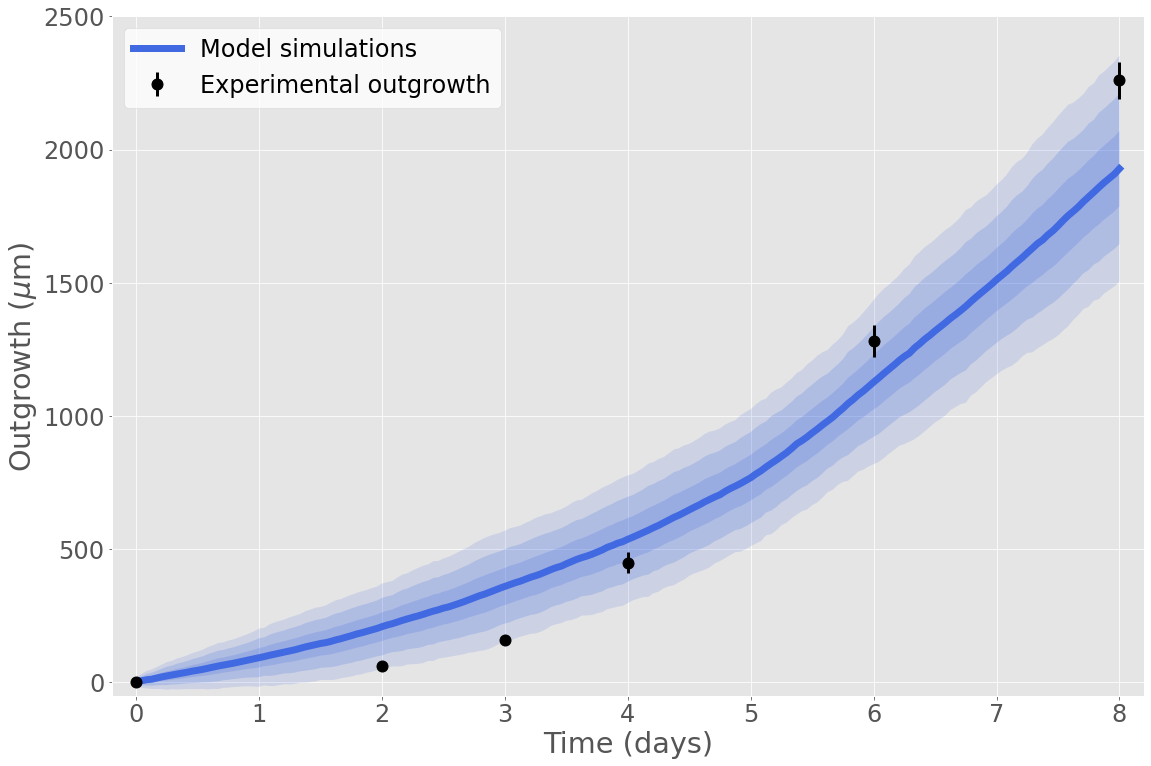

In [4]:
# run parameters    
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

# 100 simulations from main/Simulating_proportional_mapping_of_S_and_partial_synchronization_of_G1_model.ipynb
all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

# Model simulations
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, outgrowth_mean, color='royalblue', linewidth=7, label='Model simulations')
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='royalblue', alpha=0.2)
ax.fill_between(time, outgrowth_mean-2*outgrowth_std, outgrowth_mean+2*outgrowth_std, where=(outgrowth_mean-2*outgrowth_std)<(outgrowth_mean-outgrowth_std), facecolor='royalblue', alpha=0.2)
ax.fill_between(time, outgrowth_mean-3*outgrowth_std, outgrowth_mean+3*outgrowth_std, where=(outgrowth_mean-3*outgrowth_std)<(outgrowth_mean-outgrowth_std), facecolor='royalblue', alpha=0.15)

plot_create()